# <span style="color:blue"> Esercizio 6
# 6.01
    
L'esercizio consiste nell'applicazione dell'algoritmo di Metropolis e dell'algoritmo di Gibbs attraverso il modello monodimensionale di Ising. Il modello infatti permette di simulare il comportamento di un sistema ferromagnetico con N gradi di libertà, corrispondenti a N momenti di dipolo magnetici dovuti alla configurazione discreta ($\pm$ 1) degli spin atomici. 
Infine, essendo la funzione di ripatizione del modello di Ising 1-dimensionale risolubile esattamente, ci proponiamo di confrontare i risultati ottenuti attraverso le due simulazioni con i risultati esatti attesi. 
 
La simulazione è stata effettuata con N=50 spin, in unità di LJ (perciò $K_b=1$ e $\mu_B=1$) e considerando le interazioni con gli spin "primi vicini" attraverso le PBC. Perciò l'hamiltoniana del sistema risulta essere:
$$    
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) $$  

Una volta determinata analiticamente la funzione di ripartizione, è possibile ricavare tutte le grandezze termodinamiche passando dall'energia libera di Helmholtz $A = -k_B T \ln Z$.
    
Sono state effettuate 21 simulazioni per temperature equispaziate comprese fra $[0.5; 2.0]$ nelle quali i pesi di boltzmann $\frac{\exp \left( -\beta H\right)}{Z}$ sono stati campionati secondo i due algoritmi:
    
#### Metropolis   
Ogni step con Metropolis consiste nel campionare casualmente per $N=50$ volte il valore di uno spin estratto casualmente. La "proposta di mossa"  $T(y|x)$ consiste nell'invertire il valore dello spin i-esimo da $\pm 1$ a $\mp$ passando quindi da una configurazione degli spin precedente $x$ ad una nuova configurazione $y$. Dato che $T(y|x)$=$T(x|y)$ l'accettazione della mossa dipende dalla differenza dei livelli energetici delle due configurazioni: $$A({y}|{x})=\min[1, \frac{p(y)}{p(x)}]=\min[1, \exp \left( -\beta (E_y-E_x)\right)]$$
Una volta determinato il valore di $A({y}|{x})$, viene estratto uniformemente r fra $[0,1]$ e il nuovo punto campionato risulta essere $y$, se $r\leq \alpha$, oppure ancora $x$ se $r>\alpha$.
Perciò, nel caso la nuova configurazione $y$ si trovi ad un livello energetico minore, verrà automaticamente accettata.   
    
#### Gibbs
    
Come nel caso precedente, per ogni step vengono campionati casualemente 50 variabili i-esime. 
Differentemente però, nell'algoritmo di Gibbs la mossa viene sempre accettata (di fatti è possibile vederlo come un Metropolis con A=1) ed è possibile applicarlo quando le variabili in considerazioni hanno un numero limitato di valori possibili (nel nostro caso solo $\pm 1$). Il campionamento dell'i-esima variabile avviene attraverso la probabilità condizionata data dal valore di tutte le altre varibili. Nel caso in esame, volendo campionare i pesi di Boltzmann i quali dipendono dal valore dell'energia e considerando solamente le interazioni fra i primi vicini nell'hamiltoniana, la distribuzione di probabilità condizionata della variabile i-esima dipenderà solamente dai valori si $S_{i-1}$ e $S_{i+1}$, e avrà la forma di: 
        $$\frac{1}{1+\exp(-\beta \Delta E))}$$ dove $\Delta E= \pm 2J(S_{i-1)} + S_{i+1})-2h$ nel caso lo spin proposto sia cambiato di segno. 

Infine, la configurazione che minimizza l'energia del sistema è quella che allinea gli spin con il valore precedente e successivo, e che si allinea alla direzione del campo esterno $h$ nel caso sia $\neq0$ (le simulazioni sono state effettuate sia con campo magnetico esterno $h=0$ che con $h=0.02$). 
    
### Simulazione
L'incertezza viene stimata attraverso il metodo a blocchi, con un numero di blocchi $N_b=20$, di M=50000 step ciascuno, per un totale di $N\times M=10^6$ step.     

### Equilibrazione
Il codice prevede la partenza da una configurazione ottenuta campionando in modo casuale i valori degli spin. Perciò,  è stata implementata, attraverso una variabile booleana, la possibilità di ripartire da una configurazione precedente ($config.old$). In tal modo, prima di ogni simulazione a T fissata, vengono effettuati $N\times M=10^6$ step di equilibrazione, al fine di ottenere una configurazione di partenza adatta. Nell'immagine seguente è rappresentata la configurazione degli spin prima e dopo l'equilibrazione nel caso dell'algoritmo Metropolis a campo esterno nullo alla temperatura di $T=0.5$ e $T=1.925$. Come si può notare, a $T \to 0$ la configurazione diventa molto più ordinata, mentre nel caso di $T$ grande risulta più caotica. Infine, gli spin tendono ad ordinarsi in blocchi corrispondenti allo stesso valore, condizione che minimizza l'energia.

== Input ==
Range Temperature :  0.5  -  2.0
Number of spins :  50.0
J :  1.0
H :  0.0
Equilibration restart :  yes
Number of simulations :  20
Temperature step :  0.075


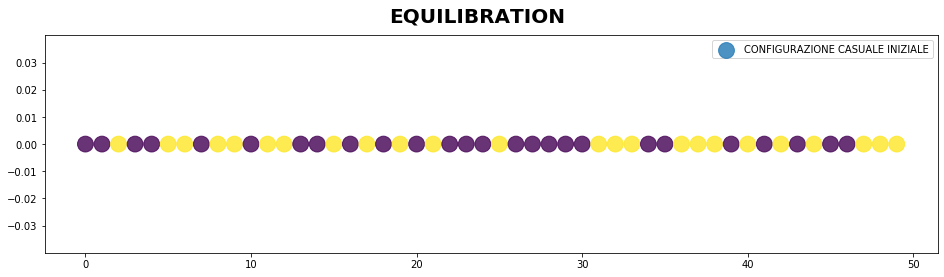

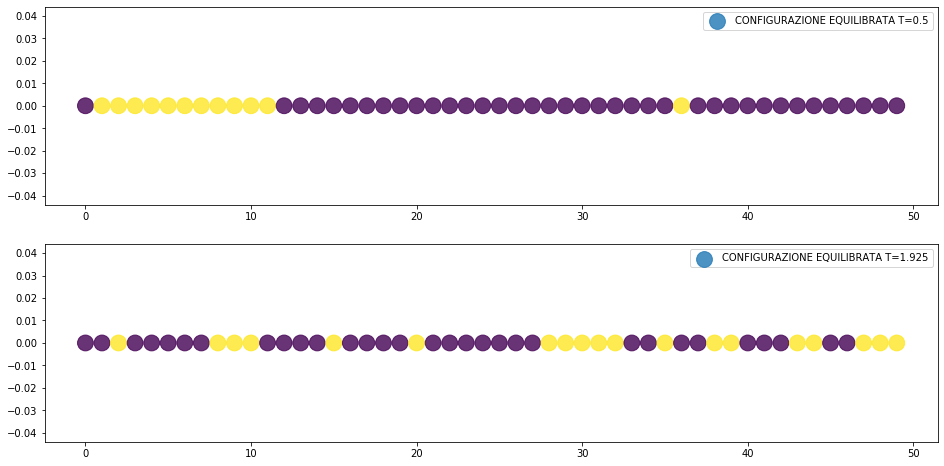

In [2]:
import matplotlib.pyplot as plt
import numpy as np


#print initial conditions
n=20
init=np.loadtxt("input.dat", usecols=(0), unpack=True, max_rows=9)
if (init[7]==1) :
    rstart="yes"
else : 
    rstart="no"
print ("=================")
print ("=================")
print ("== Input ==")
print ("Range Temperature : ", init[0],  " - ",  init[8])
print ("Number of spins : ", init[1])
print ("J : ", init[2])
print ("H : ", init[3])
print ("Equilibration restart : ", rstart)
print ("Number of simulations : ", n)
print ("Temperature step : ", (init[8]-init[0])/n)
print ("=================")
print ("=================")



fig=plt.figure(figsize=(16,4))
fig.suptitle('EQUILIBRATION', fontsize=20, fontweight="bold")


x=np.arange(0, 50, 1.0)
val=[0] * 50
y =np.loadtxt("config.0", usecols=(0),  unpack=True)
area = 250  # 0 to 15 point radii
plt.scatter(x, val, s=area, c=y, cmap='viridis', alpha=0.8, label = "CONFIGURAZIONE CASUALE INIZIALE")
plt.legend()

fig=plt.figure(figsize=(16,8))
plt.subplot(211)

x=np.arange(0, 50, 1.0)
val=[0] * 50
y =np.loadtxt("config/config0.old", usecols=(0),  unpack=True)
area = 250  # 0 to 15 point radii
plt.scatter(x, val, s=area, c=y, cmap='viridis', alpha=0.8, label = "CONFIGURAZIONE EQUILIBRATA T=0.5")
plt.legend()

plt.subplot(212)

x=np.arange(0, 50, 1.0)
val=[0] * 50
y =np.loadtxt("config/config19.old", usecols=(0),  unpack=True)
area = 250  # 0 to 15 point radii
plt.scatter(x, val, s=area, c=y, cmap='viridis', alpha=0.8, label =  "CONFIGURAZIONE EQUILIBRATA T=1.925")
plt.legend()

plt.show()

### Energia Interna 
Il grafico seguente mostra i valori dell'energia interna per particella $U(N,T) = \langle H \rangle_{h=0}$ ottenuti con Metropolis e Gibbs, confrontati con la curva seguente curva esatta nel caso $h=0$: $$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$ 

Nel secondo grafico è rappresentata la differenza fra i valori ottenuti dalla simulazione con i valori esatti, mentre nella terza immagine vengono confrontati i valori dell'incertezza in funzione del numero di blocchi dell'ultima simulazione, ovvero per $T=2.0$
Nelle sezioni successive verranno riportate solamente le funzioni analitiche. 

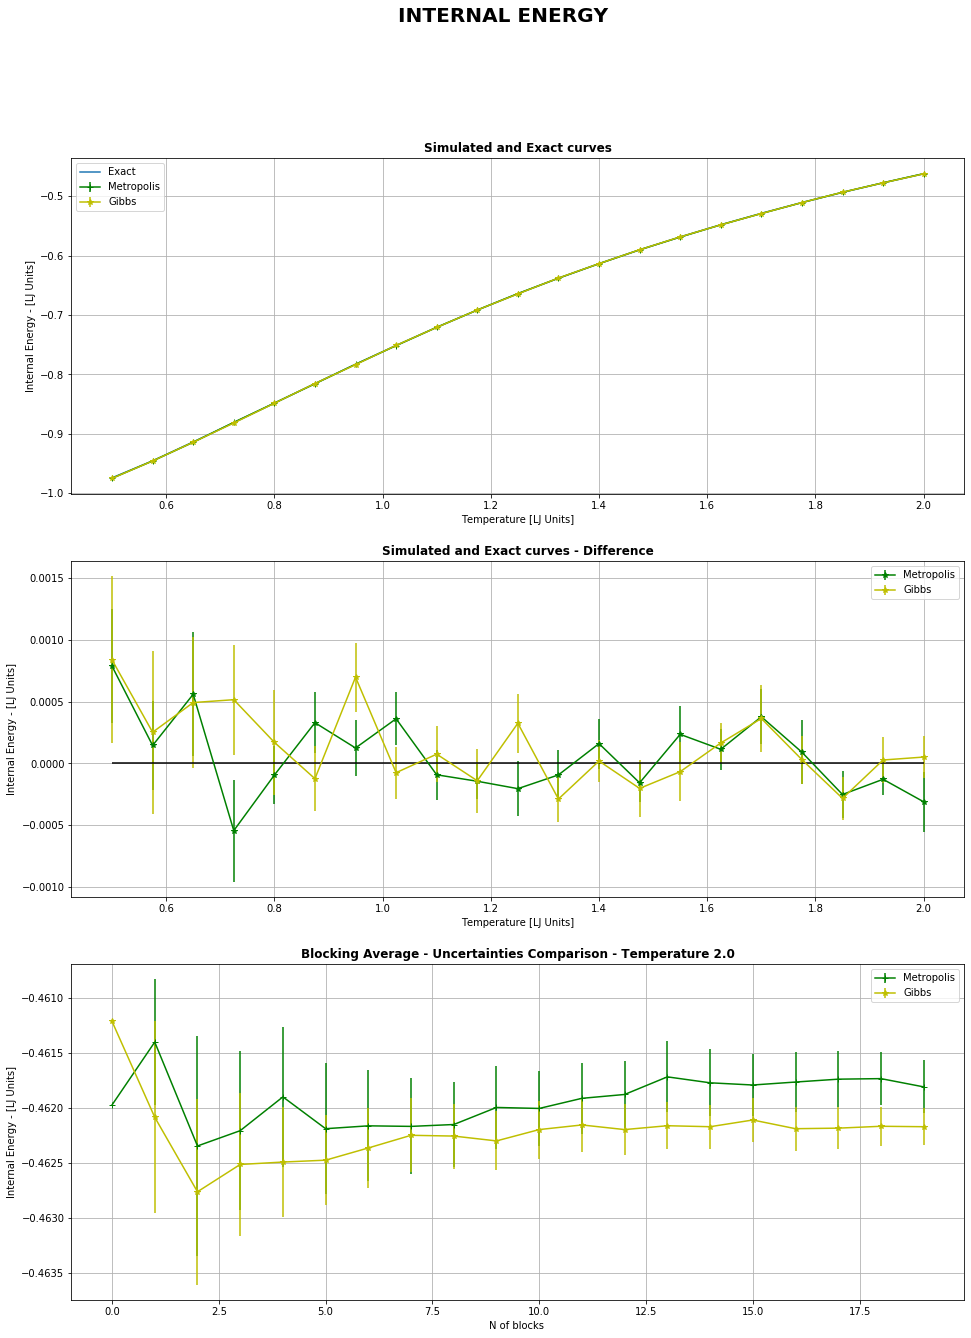

In [22]:
fig=plt.figure(figsize=(16,21))
x=np.arange(0, n+1, 1.0)

#Energy per Particle - results and graph
plt.subplot(311)
valm = []
errm = []
valg = []
errg = []
blckm = []
blockerrm = []
blckg = []
blockerrg = []
for i in range(0,n+1):
    x[i]=init[0]+0.075*x[i]
    valm.append(np.loadtxt("output/output"+str(i)+".10.ene", skiprows=(19), usecols=(2), unpack=True))
    errm.append(np.loadtxt("output/output"+str(i)+".10.ene", skiprows=(19), usecols=(3), unpack=True))
    valg.append(np.loadtxt("output/output"+str(i)+".00.ene", skiprows=(19), usecols=(2), unpack=True))
    errg.append(np.loadtxt("output/output"+str(i)+".00.ene", skiprows=(19), usecols=(3), unpack=True))
fig.suptitle('INTERNAL ENERGY', fontsize=20, fontweight="bold")
plt.errorbar(x, valm, yerr=errm, label="Metropolis", marker = "+", color= "g")
plt.errorbar(x, valg, yerr=errg, label="Gibbs", marker = "*", color= "y")
plt.title("Simulated and Exact curves", fontweight="bold")
plt.xlabel("Temperature [LJ Units]")
plt.ylabel("Internal Energy - [LJ Units]")

points=21
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, label = "Exact")
plt.grid(True)
plt.legend()

diffm = []
diffg = []
diffm= e - valm
diffg= e - valg

plt.subplot(312)
plt.errorbar(x, diffm, yerr=errm, label="Metropolis", marker = "*", color= "g")
plt.errorbar(x, diffg, yerr=errg, label="Gibbs", marker = "*", color= "y")
plt.hlines(0, 0.5, 2.0)
plt.title("Simulated and Exact curves - Difference", fontweight="bold")
plt.xlabel("Temperature [LJ Units]")
plt.ylabel("Internal Energy - [LJ Units]")
plt.grid(True)
plt.legend()


plt.subplot(313)
x=np.arange(20);

blckm, blckerrm=np.loadtxt("output/output20.10.ene", usecols=(2, 3), unpack=True)
blckg, blckerrg=np.loadtxt("output/output20.00.ene", usecols=(2, 3), unpack=True)

plt.errorbar(x, blckm, yerr=blckerrm, label="Metropolis", marker = "+", color= "g")
plt.errorbar(x, blckg, yerr=blckerrg, label="Gibbs", marker = "*", color= "y")
plt.title("Blocking Average - Uncertainties Comparison - Temperature 2.0", fontweight="bold")
plt.xlabel("N of blocks ")
plt.ylabel("Internal Energy - [LJ Units]")
plt.grid(True)
plt.legend()

plt.show()

### Capacità Termica
1. Simulazione:
$C(N,T)/N = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)/N$  
2. Curva Esatta:
$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$
3. Confronto incertezza per $T=2.0$

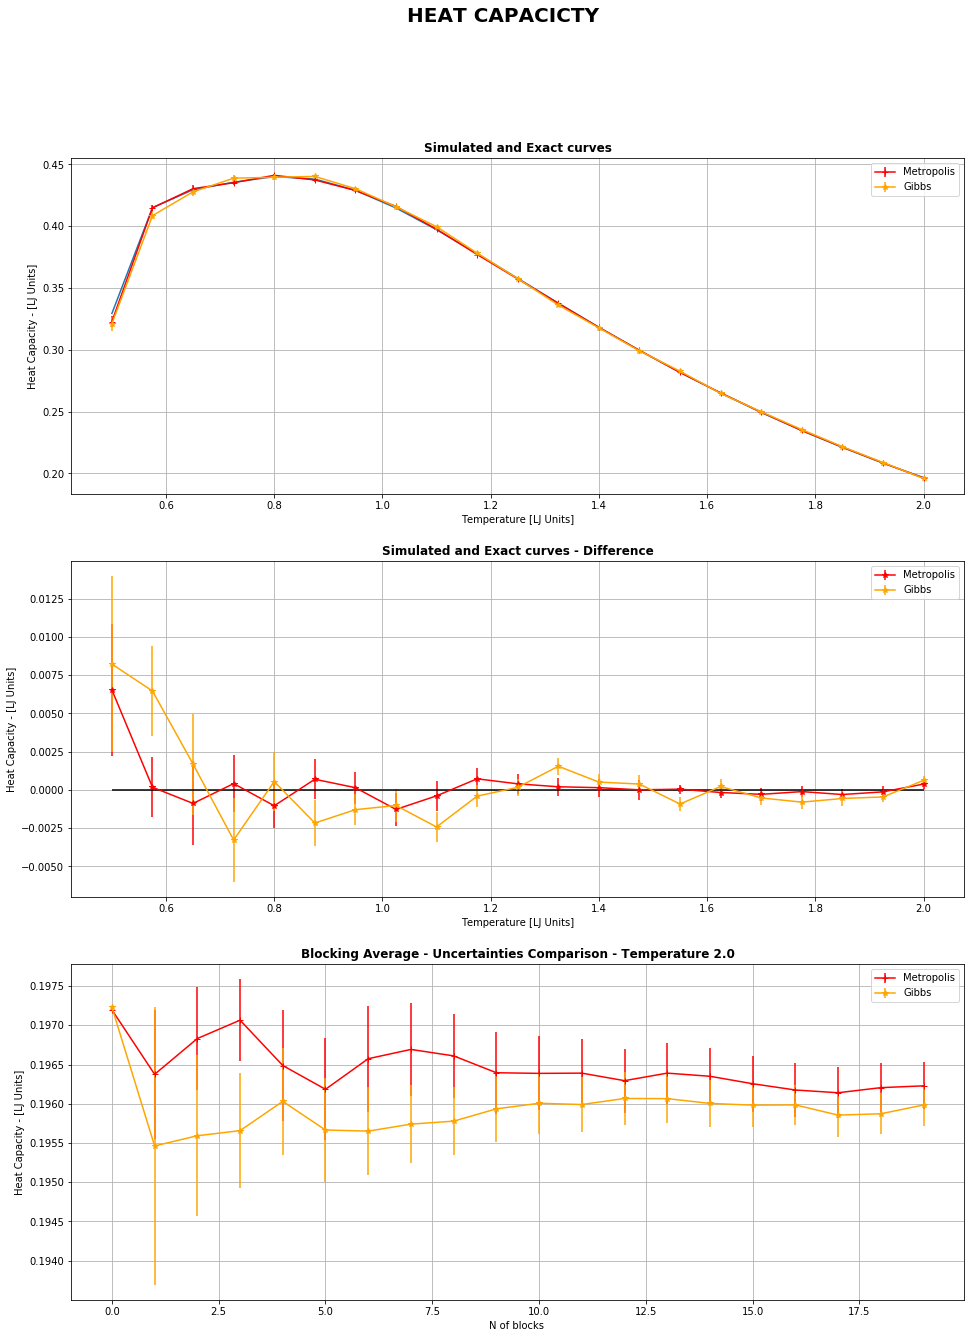

In [25]:
fig=plt.figure(figsize=(16,21))
x=np.arange(0, n+1, 1.0)

#Heat Capacity per Particle - results and graph
plt.subplot(311)
valm = []
errm = []
valg = []
errg = []
blckm = []
blockerrm = []
blckg = []
blockerrg = []
for i in range(0,n+1):
    x[i]=init[0]+0.075*x[i]
    valm.append(np.loadtxt("output/output"+str(i)+".10.heat", skiprows=(19), usecols=(2), unpack=True))
    errm.append(np.loadtxt("output/output"+str(i)+".10.heat", skiprows=(19), usecols=(3), unpack=True))
    valg.append(np.loadtxt("output/output"+str(i)+".00.heat", skiprows=(19), usecols=(2), unpack=True))
    errg.append(np.loadtxt("output/output"+str(i)+".00.heat", skiprows=(19), usecols=(3), unpack=True))
fig.suptitle('HEAT CAPACICTY', fontsize=20, fontweight="bold")
plt.errorbar(x, valm, yerr=errm, label="Metropolis", marker = "+", color= "r")
plt.errorbar(x, valg, yerr=errg, label="Gibbs", marker = "*", color= "orange")
plt.title("Simulated and Exact curves", fontweight="bold")
plt.xlabel("Temperature [LJ Units]")
plt.ylabel("Heat Capacity - [LJ Units]")

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.grid(True)
plt.legend()


diffm = []
diffg = []
diffm= heat - valm
diffg= heat - valg

plt.subplot(312)
plt.errorbar(x, diffm, yerr=errm, label="Metropolis", marker = "*", color= "r")
plt.errorbar(x, diffg, yerr=errg, label="Gibbs", marker = "*", color= "orange")
plt.hlines(0, 0.5, 2.0)
plt.title("Simulated and Exact curves - Difference", fontweight="bold")
plt.xlabel("Temperature [LJ Units]")
plt.ylabel("Heat Capacity - [LJ Units]")
plt.grid(True)
plt.legend()

plt.subplot(313)
x=np.arange(20);

blckm, blckerrm=np.loadtxt("output/output20.10.heat", usecols=(2, 3), unpack=True)
blckg, blckerrg=np.loadtxt("output/output20.00.heat", usecols=(2, 3), unpack=True)

plt.errorbar(x, blckm, yerr=blckerrm, label="Metropolis", marker = "+", color= "r")
plt.errorbar(x, blckg, yerr=blckerrg, label="Gibbs", marker = "*", color= "orange")
plt.title("Blocking Average - Uncertainties Comparison - Temperature 2.0", fontweight="bold")
plt.xlabel("N of blocks ")
plt.ylabel("Heat Capacity - [LJ Units]")
plt.grid(True)
plt.legend()

plt.show()

### Suscettività Magnetica
1. Simulazione:
$\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
2. Curva Esatta:
$$
\chi(N,T) = \frac{\partial M}{\partial h} = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$
3. Confronto incertezza per $T=0.5$

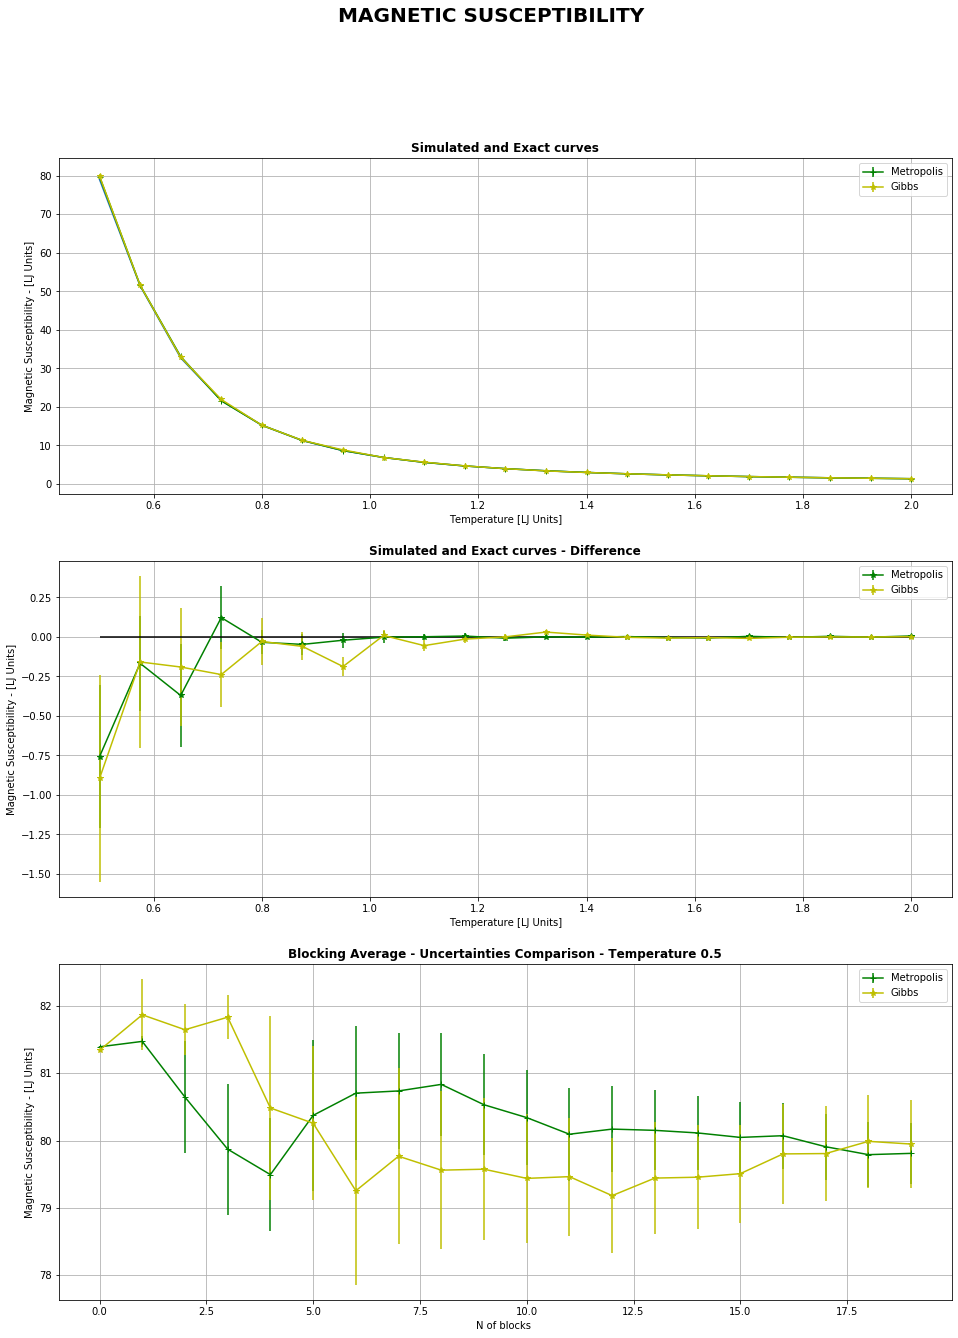

In [24]:
fig=plt.figure(figsize=(16,21))
x=np.arange(0, n+1, 1.0)

#Magnetic Susceptibility - results and graph
plt.subplot(311)
valm = []
errm = []
valg = []
errg = []
blckm = []
blockerrm = []
blckg = []
blockerrg = []
for i in range(0,n+1):
    x[i]=init[0]+0.075*x[i]
    valm.append(np.loadtxt("output/output"+str(i)+".10.chi", skiprows=(19), usecols=(2), unpack=True))
    errm.append(np.loadtxt("output/output"+str(i)+".10.chi", skiprows=(19), usecols=(3), unpack=True))
    valg.append(np.loadtxt("output/output"+str(i)+".00.chi", skiprows=(19), usecols=(2), unpack=True))
    errg.append(np.loadtxt("output/output"+str(i)+".00.chi", skiprows=(19), usecols=(3), unpack=True))
fig.suptitle('MAGNETIC SUSCEPTIBILITY', fontsize=20, fontweight="bold")
plt.errorbar(x, valm, yerr=errm, label="Metropolis", marker = "+", color= "g")
plt.errorbar(x, valg, yerr=errg, label="Gibbs", marker = "*", color= "y")
plt.title("Simulated and Exact curves", fontweight="bold")
plt.xlabel("Temperature [LJ Units]")
plt.ylabel("Magnetic Susceptibility - [LJ Units]")

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.grid(True)
plt.legend()


diffm = []
diffg = []
diffm= X - valm
diffg= X - valg

plt.subplot(312)
plt.errorbar(x, diffm, yerr=errm, label="Metropolis", marker = "*", color= "g")
plt.errorbar(x, diffg, yerr=errg, label="Gibbs", marker = "*", color= "y")
plt.hlines(0, 0.5, 2.0)
plt.title("Simulated and Exact curves - Difference", fontweight="bold")
plt.xlabel("Temperature [LJ Units]")
plt.ylabel("Magnetic Susceptibility - [LJ Units]")
plt.grid(True)
plt.legend()

plt.subplot(313)
x=np.arange(20);

blckm, blckerrm=np.loadtxt("output/output0.10.chi", usecols=(2, 3), unpack=True)
blckg, blckerrg=np.loadtxt("output/output0.00.chi", usecols=(2, 3), unpack=True)

plt.errorbar(x, blckm, yerr=blckerrm, label="Metropolis", marker = "+", color= "g")
plt.errorbar(x, blckg, yerr=blckerrg, label="Gibbs", marker = "*", color= "y")
plt.title("Blocking Average - Uncertainties Comparison - Temperature 0.5", fontweight="bold")
plt.xlabel("N of blocks ")
plt.ylabel("Magnetic Susceptibility - [LJ Units]")
plt.grid(True)
plt.legend()

plt.show()

### Magnetizzazione
1. Simulazione:
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$
2. Curva Esatta:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$
3. Confronto incertezza per $T=0.5$

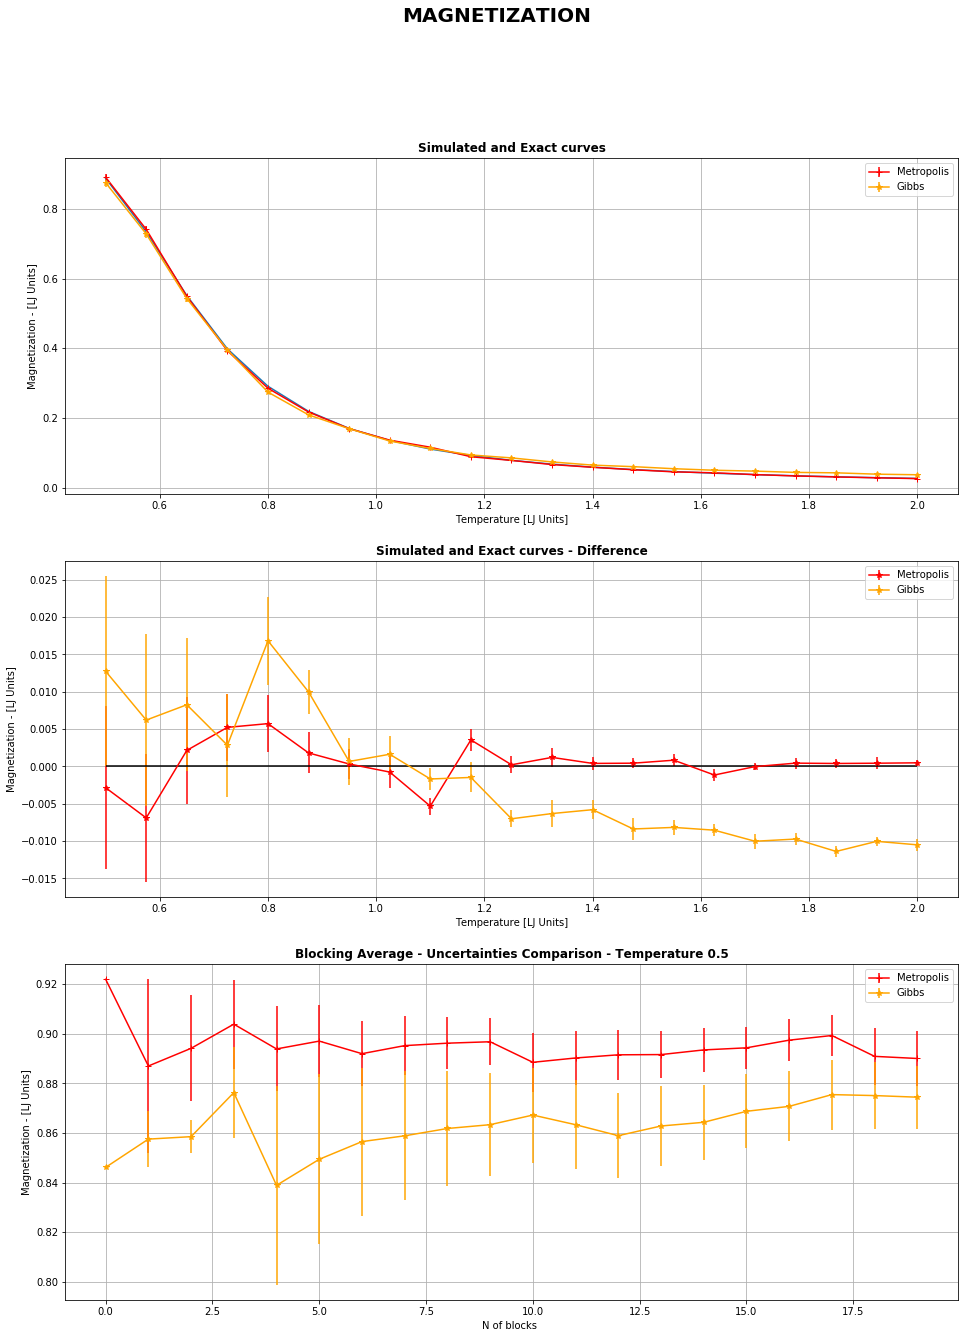

In [27]:
fig=plt.figure(figsize=(16,21))
x=np.arange(0, n+1, 1.0)

#Magnetization - results and graph
plt.subplot(311)
valm = []
errm = []
valg = []
errg = []
blckm = []
blockerrm = []
blckg = []
blockerrg = []
for i in range(0,n+1):
    x[i]=init[0]+0.075*x[i]
    valm.append(np.loadtxt("output/output"+str(i)+".11.mag", skiprows=(19), usecols=(2), unpack=True))
    errm.append(np.loadtxt("output/output"+str(i)+".11.mag", skiprows=(19), usecols=(3), unpack=True))
    valg.append(np.loadtxt("output/output"+str(i)+".01.mag", skiprows=(19), usecols=(2), unpack=True))
    errg.append(np.loadtxt("output/output"+str(i)+".01.mag", skiprows=(19), usecols=(3), unpack=True))
fig.suptitle('MAGNETIZATION', fontsize=20, fontweight="bold")
plt.errorbar(x, valm, yerr=errm, label="Metropolis", marker = "+", color= "r")
plt.errorbar(x, valg, yerr=errg, label="Gibbs", marker = "*", color= "orange")
plt.title("Simulated and Exact curves", fontweight="bold")
plt.xlabel("Temperature [LJ Units]")
plt.ylabel("Magnetization - [LJ Units]")

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.grid(True)
plt.legend()

diffm = []
diffg = []
diffm= M - valm
diffg= M - valg

plt.subplot(312)
plt.errorbar(x, diffm, yerr=errm, label="Metropolis", marker = "*", color= "r")
plt.errorbar(x, diffg, yerr=errg, label="Gibbs", marker = "*", color= "orange")
plt.hlines(0, 0.5, 2.0)
plt.title("Simulated and Exact curves - Difference", fontweight="bold")
plt.xlabel("Temperature [LJ Units]")
plt.ylabel("Magnetization - [LJ Units]")
plt.grid(True)
plt.legend()

plt.subplot(313)
x=np.arange(20);

blckm, blckerrm=np.loadtxt("output/output0.11.mag", usecols=(2, 3), unpack=True)
blckg, blckerrg=np.loadtxt("output/output0.01.mag", usecols=(2, 3), unpack=True)

plt.errorbar(x, blckm, yerr=blckerrm, label="Metropolis", marker = "+", color= "r")
plt.errorbar(x, blckg, yerr=blckerrg, label="Gibbs", marker = "*", color= "orange")
plt.title("Blocking Average - Uncertainties Comparison - Temperature 0.5", fontweight="bold")
plt.xlabel("N of blocks ")
plt.ylabel("Magnetization - [LJ Units]")
plt.grid(True)
plt.legend()

plt.show()

### Accettanza
Infine è mostrato il grafico dell'andamento dell'accettanza in funzione della temperatura. Si può notare l'andamento crescente dovuto alla variazione del termine $\beta=\frac{1}{T}$ nel campionamento dei pesi di Boltzmann. Vista la bassa accettanza a temperature intorno a $T=0.5$ sono stati effettuati M=50000 campionamenti per tutte le temperature.

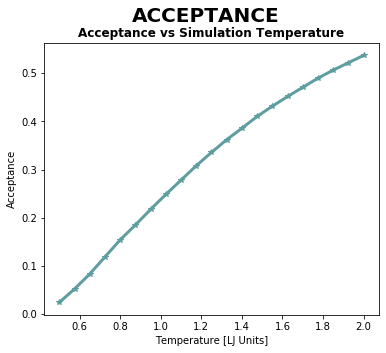

In [28]:
### fig=plt.figure(figsize=(10,7))
x=np.arange(0, n+1, 1.0)
val=np.loadtxt("output/Acceptance10.out", usecols=(0),  unpack=True)
for i in range(0,n+1):
    x[i]=init[0]+0.075*x[i]
fig=plt.figure(figsize=(6,5))
fig.suptitle('ACCEPTANCE', fontsize=20, fontweight="bold")
plt.plot(x, val, label="Metropolis", marker = "*", color= "cadetblue", linewidth = 3.)
plt.title("Acceptance vs Simulation Temperature", fontweight="bold")
plt.xlabel("Temperature [LJ Units]")
plt.ylabel("Acceptance")
plt.show()

